In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()


In [3]:
df = pd.read_excel('Fashion - Assignment Data (3).xlsx', header=[1])

df.shape

(49999, 15)

In [4]:
df.head()

,timestamp,user ID,ip_address,Product_Name,Product_ID,Is_First_Order,User_Gender,Payment_Type,Number_of_Products,Order_Coupon_Code,City,Country_Province,User_Birthday,Country,Revenue
0,2017-10-21 20:52:31,0,49.227.243.31,Kendrick,SE043SH31VBS,0,female,cc@braintree,1,YAY15,Kaitaia,NaN,1993-10-05 00:00:00,NZ,212.5
1,2017-10-21 20:55:12,0,111.220.172.119,Smartwatch Bradshaw Gold,MI329AC90OUB,1,male,pbi@afterpay,1,NaN,Shepparton,VIC,NaN,AU,526.36
2,2017-10-21 20:56:41,0,210.84.59.179,Classic Slides,SA849SH69SAK,1,female,cc@braintree,1,NaN,Essendon,VIC,NaN,AU,77.23
3,2017-10-21 20:59:27,0,59.167.79.119,Bonaire Flared Sleeve Tunic,SH045AA22AGR,0,female,pbi@afterpay,1,NaN,Karabar,NSW,NaN,AU,190.91
4,2017-10-21 21:00:56,0,1.129.107.188,Tall Tales Man Style Pants,MA146AA45RAK,0,female,cc@braintree,1,NaN,Mosman,NSW,NaN,AU,204.09


In [4]:
df['Number_of_Products'].nunique()

263

In [5]:
df['Product_ID'].nunique()

36019

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           49999 non-null  datetime64[ns]
 1   user ID             49999 non-null  int64         
 2   ip_address          49999 non-null  object        
 3   Product_Name        49999 non-null  object        
 4   Product_ID          49999 non-null  object        
 5   Is_First_Order      49999 non-null  object        
 6   User_Gender         48825 non-null  object        
 7   Payment_Type        49999 non-null  object        
 8   Number_of_Products  49999 non-null  object        
 9   Order_Coupon_Code   11894 non-null  object        
 10  City                49662 non-null  object        
 11  Country_Province    45819 non-null  object        
 12  User_Birthday       22724 non-null  object        
 13  Country             49999 non-null  object    

# Task

### 1. Provide an overview of the brand's sales by the following attributes:
1. •	Overall - Total Sales and Revenue in the given time period
2. •	Basket - Avg. unique quantity, revenue per order.
3. •	Attributes - Time of Day, Day of Week, Geography, Payment Type
4. •	Frequency - How many are single/multiple purchasers? What is the frequency of multi-purchase? Any typical attributes?

Before Any Analysis, Exploring the data is a necessary step to do first

In [21]:
df[df['Revenue'] == 'undefined']

,timestamp,user ID,ip_address,Product_Name,Product_ID,Is_First_Order,User_Gender,Payment_Type,Number_of_Products,Order_Coupon_Code,City,Country_Province,User_Birthday,Country,Revenue
5052,2017-10-05 00:50:56,4407,66.102.6.141,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
7324,2017-10-09 09:37:51,6344,66.102.6.242,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
7821,2017-10-20 02:09:48,6779,66.249.88.56,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
10450,2017-10-19 00:18:09,9107,66.102.6.139,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
10940,2017-10-06 02:59:02,9556,66.102.6.79,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
13740,2017-10-08 05:55:50,12043,66.249.88.23,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
21219,2017-10-11 13:38:30,18641,66.249.88.23,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
23648,2017-10-07 05:45:39,20792,66.102.8.211,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
23896,2017-10-08 01:33:48,21017,66.102.8.215,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined
24674,2017-10-08 05:55:52,21714,66.102.8.211,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined,undefined


There are about 15 entries in the data which appers to be wrongly stored as a result of an error in the system maybe.

I decided to drop this entries since it won't offer any value to the analysis

In [5]:
print('Before Removing undefined entries', df.shape)

df = df[df['Revenue'] != 'undefined']

print('After Removing undefined entries', df.shape)

Before Removing undefined entries (49999, 15)
After Removing undefined entries (49984, 15)


I converted the Revenue columns to integer

In [6]:
df['Revenue'] = df['Revenue'].astype(float)

In [7]:
df.isna().sum()

timestamp                 0
user ID                   0
ip_address                0
Product_Name              0
Product_ID                0
Is_First_Order            0
User_Gender            1174
Payment_Type              0
Number_of_Products        0
Order_Coupon_Code     38105
City                    337
Country_Province       4180
User_Birthday         27275
Country                   0
Revenue                   0
dtype: int64

In [22]:
df.groupby('Country')['Country_Province'].value_counts()

Country  Country_Province
AU       NSW                 21728
         VIC                 11217
         QLD                  5238
         WA                   2952
         SA                   2806
         ACT                   867
         TAS                   765
         NT                    182
NZ       VIC                    16
         NSW                    14
         QLD                     8
         WA                      7
         SA                      2
         NT                      1
         TAS                     1
Name: Country_Province, dtype: int64

In [8]:
# fill missing values
df['User_Gender'] = df['User_Gender'].fillna(df['User_Gender'].mode()[0])
df['City'] = df.groupby('Country')['City'].transform(lambda x: x.fillna(x.mode()[0]))
df['Country_Province'] = df['Country_Province'].fillna(df['Country_Province'].mode()[0])

In [9]:
df['User_Gender'] = df['User_Gender'].map({'female':0, 'male':1}).astype(int)
df['Is_First_Order'] = df['Is_First_Order'].astype(int)

**Overall Total Sales and Revenue**

The Overall Total Revenue is given by the summation of all values in the Revenue column

In [10]:
total_revenue = round(sum(df['Revenue']), 2)

print(f"The Total Revenue is ${total_revenue}")

The Total Revenue is $6699843.72


Since the sales column is not given explicitly,

The Overall Total Sales is 

**• Basket - Avg. unique quantity, revenue per order**

In [28]:
df.columns

Index(['timestamp', 'user ID', 'ip_address', 'Product_Name', 'Product_ID',
       'Is_First_Order', 'User_Gender', 'Payment_Type', 'Number_of_Products',
       'Order_Coupon_Code', 'City', 'Country_Province', 'User_Birthday',
       'Country', 'Revenue'],
      dtype='object')

In [29]:
df['Is_First_Order'].unique()

array([0, 1], dtype=object)

**Average Revenue per Order**

In [31]:
pd.DataFrame(df.groupby('Is_First_Order')['Revenue'].mean())

,Revenue
Is_First_Order,
0,137.922154
1,120.945754


**Average Unique Quantity per Order**

In [28]:
avg_unQ = pd.DataFrame(df.groupby(['Is_First_Order', 'Number_of_Products'])['Revenue'].mean().sort_values()).reset_index()
avg_unQ

,Is_First_Order,Number_of_Products,Revenue
0,0,"2,2,2,2,2,2,2,1",0.00
1,0,"1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1",0.00
2,0,"1,2,1,1,2",0.00
3,0,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1",40.11
4,0,"1,1,2,1,2,1,1,1,2,2,1,1,2,2",44.23
...,...,...,...
318,0,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,...",2344.23
319,0,"2,2,2,1,2,1,1",2788.94
320,0,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1,...",3245.62
321,1,"1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,...",3473.17


In [29]:
df[df['Revenue'] == 0]

,timestamp,user ID,ip_address,Product_Name,Product_ID,Is_First_Order,User_Gender,Payment_Type,Number_of_Products,Order_Coupon_Code,City,Country_Province,User_Birthday,Country,Revenue
76,2017-10-21 23:03:21,0,101.185.77.112,May Crew-Neck Tee,TO336AA02NPT,1,1,cc@braintree,1,NaN,Glenelg,SA,1996-09-20 00:00:00,AU,0.0
176,2017-10-09 22:42:48,54,202.126.197.68,Kimberley Asymmetric Dress,TU931AA51SJS,0,0,NoPayment,1,NaN,Newmarket,NSW,1992-12-09 00:00:00,AU,0.0
218,2017-10-09 21:25:24,91,49.195.187.18,"Tacoma,Adina Block Heels,Black Eyelet Straight...","BI358SH24RMT,SP869SH98MGJ,MI570AA43MII",0,0,NoPayment,"1,1,1",NaN,Elermore Vale,NSW,NaN,AU,0.0
461,2017-10-03 09:40:40,299,144.138.48.21,"Natalie Short Sleeve Blouse,Textured Frill Wor...","AT049AA06FAJ,AT049AA61TYS,FO571AA52KOT,FO571AA...",1,0,NoPayment,"1,1,1,1",NaN,Hampton,VIC,NaN,AU,0.0
498,2017-10-17 02:49:22,334,110.32.134.209,Weekend Shorts,AS787AA92JXV,0,0,NoPayment,1,YAY15,Malvern,VIC,1987-03-28 00:00:00,AU,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49862,2017-10-05 09:39:27,43982,49.50.196.190,Sydney Mid-Volume,HE386AC54EJL,0,0,NoPayment,1,NaN,Auckland,NSW,1991-01-31 00:00:00,NZ,0.0
49872,2017-10-10 05:06:45,43989,1.144.96.125,Coast Ruffle Mini Skirt,ST722AA44GZV,0,0,NoPayment,1,NaN,Seaforth,NSW,1998-09-14 00:00:00,AU,0.0
49952,2017-10-17 23:15:52,44063,106.68.25.131,Ellette V-Neck Lace Dress,AT049AA24VDB,0,0,NoPayment,2,NaN,Nickol,WA,1989-05-30 00:00:00,AU,0.0
49955,2017-10-04 11:53:57,44066,1.152.108.22,"Bikini,Arizona Frill Blouse","CA221AC77ILA,AT049AA83WPC",1,0,paypal@braintree,"1,1",NaN,St Helena,VIC,NaN,AU,0.0


There appears to be some products that were sold to non first time orders and generated no revenue. Maybe as a result of discount or promo (coupon codes)

In [11]:
df = df[df['Revenue'] > 0]

In [12]:
df.head()

,timestamp,user ID,ip_address,Product_Name,Product_ID,Is_First_Order,User_Gender,Payment_Type,Number_of_Products,Order_Coupon_Code,City,Country_Province,User_Birthday,Country,Revenue
0,2017-10-21 20:52:31,0,49.227.243.31,Kendrick,SE043SH31VBS,0,0,cc@braintree,1,YAY15,Kaitaia,NSW,1993-10-05 00:00:00,NZ,212.50
1,2017-10-21 20:55:12,0,111.220.172.119,Smartwatch Bradshaw Gold,MI329AC90OUB,1,1,pbi@afterpay,1,NaN,Shepparton,VIC,NaN,AU,526.36
2,2017-10-21 20:56:41,0,210.84.59.179,Classic Slides,SA849SH69SAK,1,0,cc@braintree,1,NaN,Essendon,VIC,NaN,AU,77.23
3,2017-10-21 20:59:27,0,59.167.79.119,Bonaire Flared Sleeve Tunic,SH045AA22AGR,0,0,pbi@afterpay,1,NaN,Karabar,NSW,NaN,AU,190.91
4,2017-10-21 21:00:56,0,1.129.107.188,Tall Tales Man Style Pants,MA146AA45RAK,0,0,cc@braintree,1,NaN,Mosman,NSW,NaN,AU,204.09


In [39]:
df['Product_Name'].nunique(), df.Product_ID.nunique()

(33435, 36018)

**• Attributes - Time of Day, Day of Week, Geography, Payment Type**

In [13]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [14]:
# Time of Day
df['Time_of_Day'] = df['timestamp'].dt.time
df['Day_of_week'] = df['timestamp'].dt.dayofweek
df['Week_Day_Name'] = df['timestamp'].dt.day_name()

In [15]:
df[['Time_of_Day', 'Day_of_week', 'Week_Day_Name']].head()

,Time_of_Day,Day_of_week,Week_Day_Name
0,20:52:31,5,Saturday
1,20:55:12,5,Saturday
2,20:56:41,5,Saturday
3,20:59:27,5,Saturday
4,21:00:56,5,Saturday


In [42]:
start_date = df['timestamp'].min()
end_date = df['timestamp'].max()

print(f"The start date for the data was {start_date} and the end date was {end_date}")

The start date for the data was 2017-10-01 00:00:23 and the end date was 2017-10-21 23:59:50


In [43]:
print('First Purchase occur at exactly', start_date)


First Purchase occur at exactly 2017-10-01 00:00:23


In [16]:
df['Hours'] = df['timestamp'].dt.hour

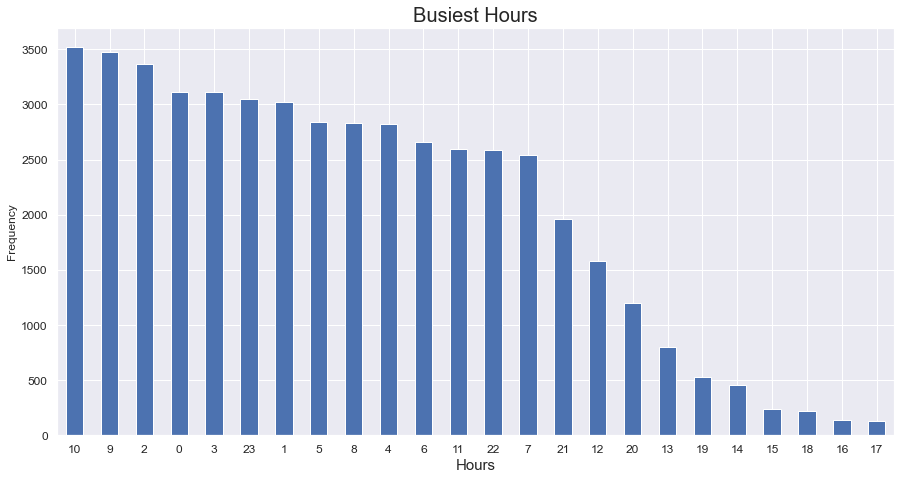

In [60]:
df['Hours'].value_counts().plot(kind='bar', figsize=(15, 7.5))
plt.title('Busiest Hours', size=20)
plt.xlabel('Hours', size=15); plt.ylabel('Frequency'); plt.xticks(rotation=0, size=12); plt.yticks(size=12);

In [50]:
df['Part_of_Day'] = pd.cut(df['Hours'], bins=[0, 5, 11, 17, 23], labels=['Midnight', 'Morning', 'Afternoon', 'Night'])

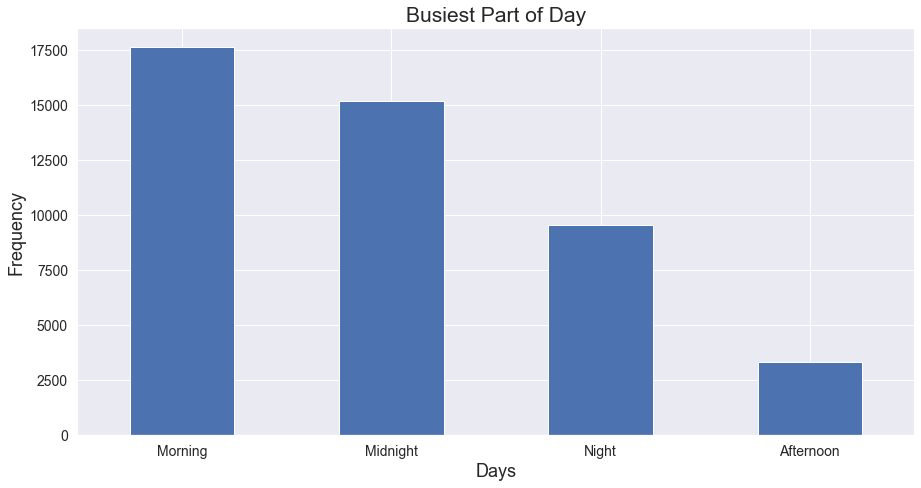

In [63]:
df['Part_of_Day'].value_counts().plot.bar(figsize=(15, 7.5))
plt.title('Busiest Part of Day', size=21)
plt.xlabel('Days', size=18); plt.ylabel('Frequency', size=18); plt.xticks(rotation=0, size=14); plt.yticks(size=14);

In [64]:
# which part of day do we have the highest revenue?
a = pd.DataFrame(df.groupby('Part_of_Day')['Revenue'].agg(['sum', 'mean']).sort_values(by=['sum','mean'],ascending=False))
a

,sum,mean
Part_of_Day,,
Morning,2389090.74,135.635900
Midnight,2061233.52,135.974241
Night,1328530.32,139.346583
Afternoon,491211.37,147.069272


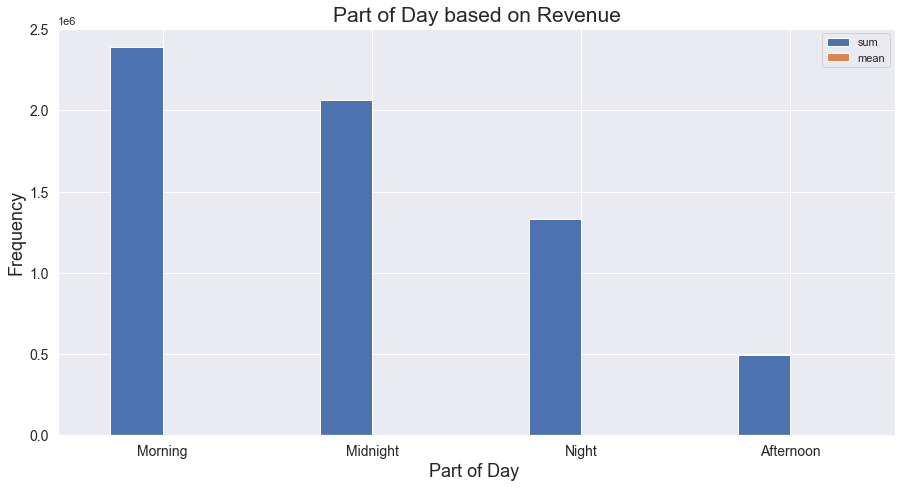

In [68]:
a.plot.bar(figsize=(15, 7.5))
plt.title('Part of Day based on Revenue', size=21)
plt.xlabel('Part of Day ', size=18); plt.ylabel('Frequency', size=18); plt.xticks(rotation=0, size=14); plt.yticks(size=14);

In [69]:
# On Average, which day does the brand make the highest revenue?

pd.DataFrame(df.groupby('Week_Day_Name')['Revenue'].mean().sort_values(ascending=False))

,Revenue
Week_Day_Name,
Sunday,144.625893
Saturday,142.649428
Monday,140.786876
Tuesday,136.300220
Thursday,134.450019
Wednesday,134.063142
Friday,133.176990


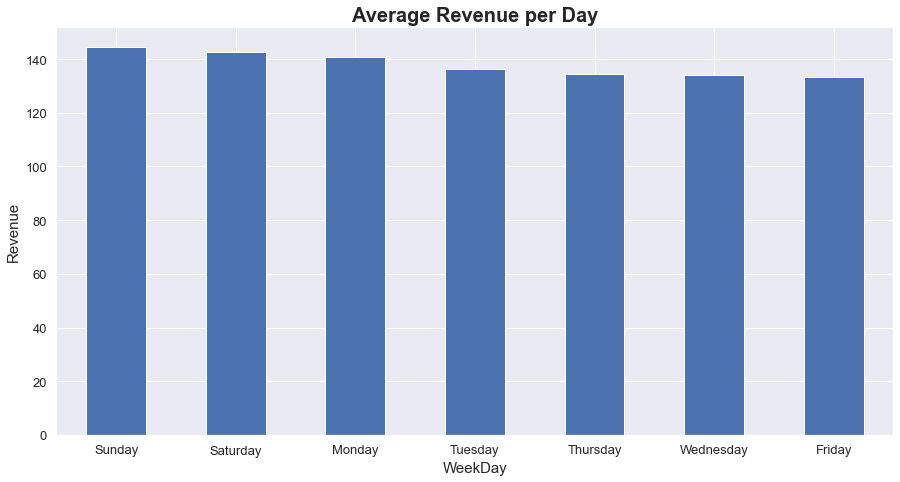

In [70]:
df.groupby('Week_Day_Name')['Revenue'].mean().sort_values(ascending=False).plot.bar(figsize=(15, 7.5))
plt.title('Average Revenue per Day', size=20, fontweight='bold')
plt.xlabel('WeekDay', size=15); plt.ylabel('Revenue', size=15)
plt.xticks(size=13, rotation=0); plt.yticks(size=13)
plt.show()

One Average, Highest revenue was recorded on Sunday,

**Payment Type**

In [71]:
print(f"Customer Uses {df['Payment_Type'].nunique()} Unique Payment Type")

Customer Uses 3 Unique Payment Type


In [72]:
df['Payment_Type'].unique()

array(['cc@braintree', 'pbi@afterpay', 'paypal@braintree'], dtype=object)

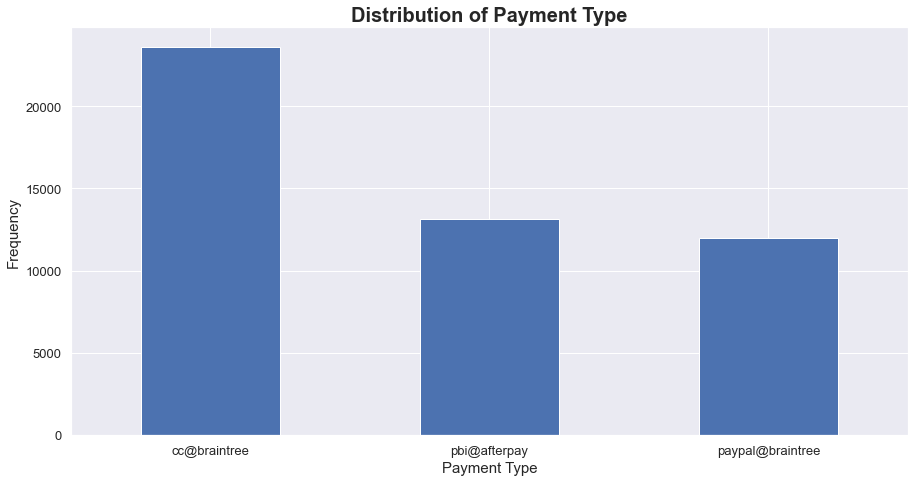

In [73]:
# which payment type is the most common amongst customers?
df['Payment_Type'].value_counts().plot.bar(figsize=(15, 7.5))
plt.title('Distribution of Payment Type', size=20, fontweight='bold')
plt.xlabel('Payment Type', size=15); plt.ylabel('Frequency', size=15)
plt.xticks(size=13, rotation=0); plt.yticks(size=13)
plt.show()

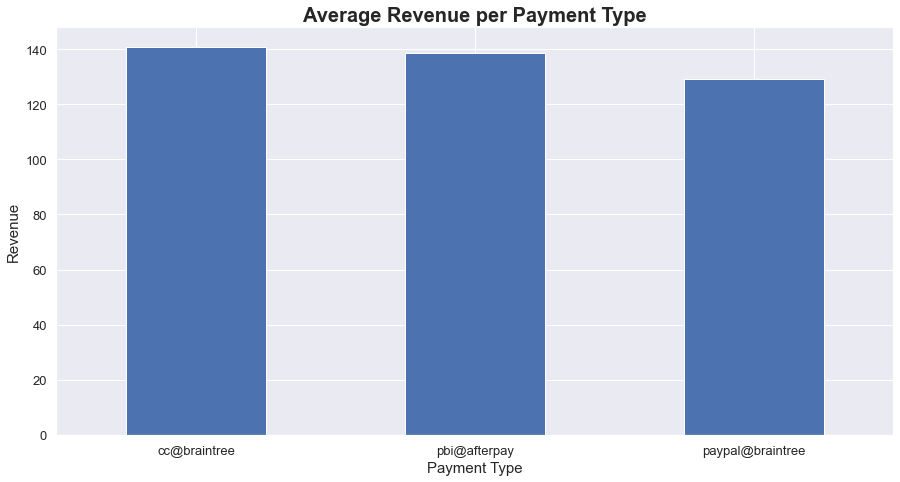

In [74]:
# which payment method generate more revenue?
df.groupby('Payment_Type')['Revenue'].mean().sort_values(ascending=False).plot.bar(figsize=(15, 7.5))
plt.title('Average Revenue per Payment Type', size=20, fontweight='bold')
plt.xlabel('Payment Type', size=15); plt.ylabel('Revenue', size=15)
plt.xticks(size=13, rotation=0); plt.yticks(size=13)
plt.show()

In [75]:
df['Payment_Type'].value_counts(normalize=True)*100

cc@braintree        48.459803
pbi@afterpay        27.005742
paypal@braintree    24.534454
Name: Payment_Type, dtype: float64

Despite Many Users 4.45% using the `cc@braintree` method of payment, the average revenue on each payment type is almost similar with exception of NoPayment method. This tells us that 

In [82]:
# which payment type is most common on a daily basis?
pd.DataFrame(df.groupby(['Week_Day_Name','Payment_Type'])['Revenue'].mean())

Revenue
Week_Day_Name Payment_Type                
Friday        cc@braintree      134.647076
              paypal@braintree  128.263338
              pbi@afterpay      135.134449
Monday        cc@braintree      144.625086
              paypal@braintree  132.802323
              pbi@afterpay      140.483517
Saturday      cc@braintree      150.800672
              paypal@braintree  128.485236
              pbi@afterpay      141.191195
Sunday        cc@braintree      150.678466
              paypal@braintree  135.850641
              pbi@afterpay      140.781999
Thursday      cc@braintree      135.610515
              paypal@braintree  129.235147
              pbi@afterpay      136.965823
Tuesday       cc@braintree      138.142404
              paypal@braintree  127.539849
              pbi@afterpay      140.735282
Wednesday     cc@braintree      137.410231
              paypal@braintree  124.617142
              pbi@afterpay      136.777126

**Geography**

In [83]:
df[['City', 'Country', 'Country_Province']].head()

,City,Country,Country_Province
0,Kaitaia,NZ,NSW
1,Shepparton,AU,VIC
2,Essendon,AU,VIC
3,Karabar,AU,NSW
4,Mosman,AU,NSW


In [18]:
a = pd.DataFrame(df.groupby(['Country_Province', 'City'])['Revenue'].mean()).reset_index()

a[a['Country_Province'] == 'ACT'][['City', 'Revenue']].sort_values(by='Revenue', ascending=False)

,City,Revenue
12,CIVIC SQUARE,639.800
52,GRIFFITH,475.280
44,Flynn,425.400
19,Chapman,372.470
65,Hawker,351.730
...,...,...
3,Aranda,60.075
30,Deakin West,58.820
37,FISHER,54.550
17,Capital Hill,49.180


In [93]:
a['Country_Province'].unique()

array(['ACT', 'NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC', 'WA'], dtype=object)

,Revenue
City,
Dilston,705.290
DEVONPORT,655.900
burnie,504.460
Waverley,422.780
Roches Beach,346.910
KINGSTON,345.320
Tayene,337.170
Forcett,335.410
Warrane,333.575


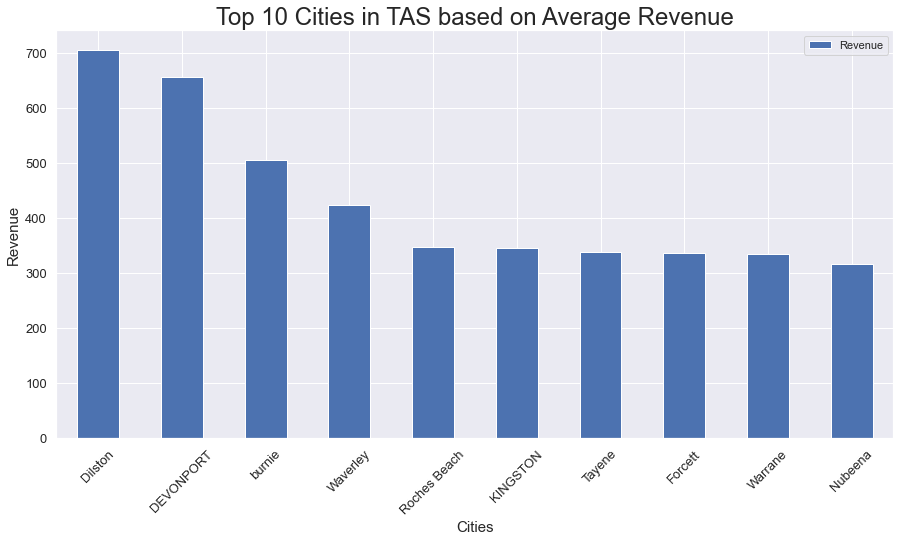

In [22]:
def check_province(province):
    b = a[a['Country_Province'] == province][['City', 'Revenue']].sort_values(by='Revenue', ascending=False)[:10]
    b = b.set_index('City')
    b.plot(kind='bar', figsize=(15, 7.5))
    plt.title(f'Top 10 Cities in {province} based on Average Revenue', size=24)
    plt.xlabel('Cities', size=15); plt.ylabel('Revenue', size=15)
    plt.xticks(size=13, rotation=45); plt.yticks(size=13)
    return b

check_province('TAS')

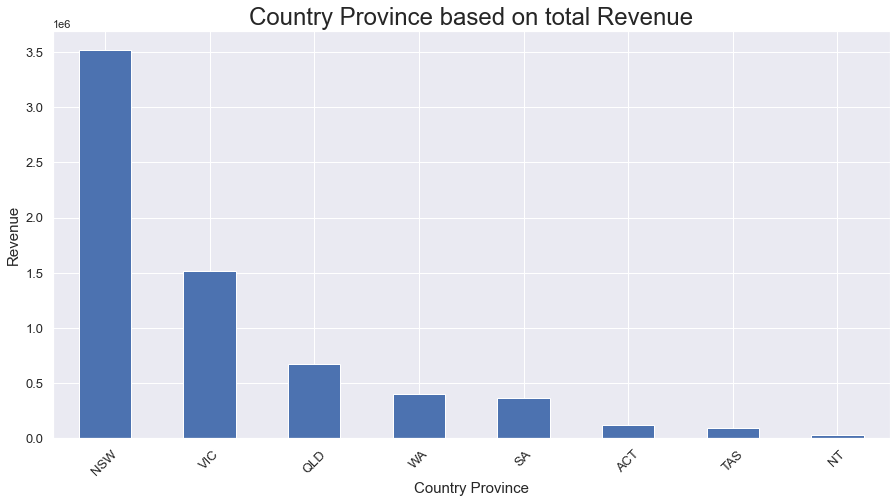

In [27]:
df.groupby('Country_Province')['Revenue'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15, 7.5))
plt.title(f'Country Province based on total Revenue', size=24)
plt.xlabel('Country Province', size=15); plt.ylabel('Revenue', size=15)
plt.xticks(size=13, rotation=45); plt.yticks(size=13)
plt.show()

**• Frequency - How many are single/multiple purchasers? What is the frequency of multi-purchase? Any typical attributes?**

By my Understanding, Single purchasers are those customers that transact only once within the dataset while multiple purchasers are the inverse

In [99]:
# finding userid with a one time occurenced
df['user ID'].nunique()

43310

In [28]:
from collections import Counter
user_id = Counter(df['user ID'])

users = pd.DataFrame(data=zip(user_id.keys(), user_id.values()), columns=['user ID', 'Count']).sort_values(by='Count', ascending=False)

users.head()

,user ID,Count
0,0,120
31878,32457,14
35090,35729,11
39464,40187,11
16102,16386,10


In [45]:
# how many single users?
users[users['Count'] == 1].shape

(39159, 2)

In [44]:
# how many multiple purchasers?
users[users['Count'] > 1].shape

(4151, 2)

**What is the frequency of multi-purchase?**

In [184]:
c, d = 0,0
for i in df['Number_of_Products']:
    if ',' in str(i):
        c += 1
    else: d+=1
c

23179

In [185]:
d

25580

**Any Typical Attributes**

In [46]:
user_id_single = users[users['Count'] == 1]['user ID']

In [47]:
len(user_id_single)

39159

In [36]:
user_id = users[users['user ID']]

In [168]:
v = df[df['user ID'].isin(user_id_single)]
v.head()

,timestamp,user ID,ip_address,Product_Name,Product_ID,Is_First_Order,User_Gender,Payment_Type,Number_of_Products,Order_Coupon_Code,...,Country_Province,User_Birthday,Country,Revenue,Time_of_Day,Day_of_week,Week_Day_Name,Hours,User_Birthyear,User_Age
121,2017-10-03 23:35:16,1,121.215.208.81,"L8 Either Or Jeans - Unisex,Quartz Nylon - Men's","LE893AA85WNE,LE451SH96MNF",0,1,pbi@afterpay,"1,1",NaN,...,NSW,1975-10-20,AU,113.55,23:35:16,1,Tuesday,23,1975.0,42.000000
122,2017-10-14 04:55:00,2,49.197.37.187,"Anja Frill Knit Top,Josie PU Cropped Jacket","AT049AA47CYY,AT049AA81VOG",1,0,cc@braintree,"1,1",NaN,...,QLD,NaT,AU,81.78,04:55:00,5,Saturday,4,NaN,35.500000
123,2017-10-04 10:37:33,3,220.245.76.109,Long Line Short Tights,LO569SA37LES,0,0,cc@braintree,1,NaN,...,NSW,1986-02-27,AU,63.63,10:37:33,2,Wednesday,10,1986.0,31.000000
124,2017-10-08 04:20:43,4,210.185.88.244,Toni Lightweight Waterfall Trench,AT049AA46EFP,0,0,pbi@afterpay,1,NaN,...,VIC,1988-05-18,AU,81.77,04:20:43,6,Sunday,4,1988.0,29.000000
125,2017-10-05 07:48:59,5,110.175.240.246,Nina Printed Pants,AT049AA69ZXE,0,0,paypal@braintree,2,NaN,...,NSW,NaT,AU,127.18,07:48:59,3,Thursday,7,NaN,30.893617


In [174]:
v['User_Age'].max(), g['User_Age'].max()

(117.0, 117.0)

In [170]:
g = df[df['user ID'].isin(user_id_single) == False]

In [65]:
g['Week_Day_Name'].value_counts()

Wednesday    1940
Tuesday      1868
Thursday     1559
Monday       1479
Friday       1044
Sunday        926
Saturday      785
Name: Week_Day_Name, dtype: int64

In [64]:
g['Order_Coupon_Code'].isna().sum(), v['Order_Coupon_Code'].isna().sum()

(7284, 29764)

In [66]:
v['Week_Day_Name'].value_counts()

Wednesday    7520
Tuesday      6885
Thursday     6512
Monday       5844
Sunday       4694
Friday       4259
Saturday     3445
Name: Week_Day_Name, dtype: int64

### 2. Product Affinity 
Which products are more likely to sell together?

I Used an Association Rule based on Country Province

In [136]:
df['Country_Province'].value_counts()

NSW    21742
VIC    11233
QLD     5246
WA      2959
SA      2808
ACT      867
TAS      766
NT       183
Name: Country_Province, dtype: int64

In [67]:
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder

# # get all the transactions as alist
# transactions = list(df1['Product_Name'].apply(lambda x: sorted(x.split(','))))

# # instantiate transaction encoder
# encoder = TransactionEncoder().fit(transactions)

# onehot = encoder.transform(transactions)

# # convert onehot encode data to DataFrame
# onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)

# onehot_df.head(10)

In [68]:
from itertools import combinations, groupby
from collections import Counter

In [69]:
df_manual = df[df['Country'] =="AU"]

orders = df_manual.set_index('user ID')['Product_Name']

In [70]:
statistics = orders.value_counts().to_frame("frequency")
statistics['support']  = statistics / len(set(orders.index)) * 100

In [72]:
# the min support is 3% which means that the product must have a frequency rate greater than this to be considered worthy 
min_support=0.03 

items_above_support = statistics[statistics['support'] >= min_support].index
orders_above_support = orders[orders.isin(items_above_support)]

In [73]:
order_counts = orders.index.value_counts()
orders_over_two_index = order_counts[order_counts>=2].index
orders_over_two = orders[orders.index.isin(orders_over_two_index)]

In [74]:
statistics = orders_over_two.value_counts().to_frame("frequency")
statistics['support']  = statistics / len(set(orders_over_two.index)) * 100

In [75]:
def itemset_generator(orders):
    orders = orders.reset_index().values
    for order_id, order_object in groupby(orders, lambda x: x[0]):
        item_list = [item[1] for item in order_object]
        for item_pair in combinations(item_list, 2):
            yield item_pair

            
itemsets_gen = itemset_generator(orders_over_two)
itemsets  = pd.Series(Counter(itemsets_gen)).to_frame("frequencyAC")
itemsets['supportAC'] = itemsets['frequencyAC'] / len(orders_over_two_index) * 100
itemsets = itemsets[itemsets['supportAC'] >= min_support]

In [76]:
itemsets.tail()

,,frequencyAC,supportAC
Amazon Dress,"Billie Lace Off Shoulder Dress,Billie Lace Off Shoulder Dress",2,0.05119
Paisley Block Heels,Wilkins,2,0.05119
Harmony Robe Black / Pink,Wilkins,2,0.05119
710 Super Skinny Jeans,L8 High Skinny Jeans,2,0.05119
L8 High Skinny Jeans,Cult Skinny Ankle Jeans,2,0.05119


In [77]:
itemsets.sample(5)

,,frequencyAC,supportAC
Vienna Ponte Pants,Donna Shorts,2,0.05119
Force of Being,Carlton Longline Coat,2,0.05119
Women's Tubular Shadow,"Womens Through The Smoke T Shirt,Womens Through The Smoke T Shirt,Long Sleeve Mesh Top,Emily Twist Collar Tee,RB Authority Dolman Box Tee,Sienna Off-Shoulder Tee",2,0.05119
"Back To Basics Leggings,Curve Singlet,High Rise Leggings",Arizona,2,0.05119
Crawford Fit And Flare Dress,Groove Armada Fit n Flare Dress,2,0.05119


In [78]:
# Create table of association rules and compute relevant metrics
itemsets = itemsets.reset_index().rename(columns={'level_0': 'antecedents', 'level_1': 'consequents'})

itemsets = (itemsets
     .merge(statistics.rename(columns={'freq': 'freqA', 'support': 'antecedent support'}), left_on='antecedents', right_index=True)
     .merge(statistics.rename(columns={'freq': 'freqC', 'support': 'consequents support'}), left_on='consequents', right_index=True))


itemsets['confidenceAtoC'] = itemsets['supportAC'] / itemsets['antecedent support']
itemsets['confidenceCtoA'] = itemsets['supportAC'] / itemsets['consequents support']
itemsets['lift'] = itemsets['supportAC'] / (itemsets['antecedent support'] * itemsets['consequents support'])

itemsets=itemsets[['antecedents', 'consequents','antecedent support', 'consequents support', 'confidenceAtoC','lift']]

In [79]:
rules = itemsets
rules_over_50 = rules[(rules.confidenceAtoC >0.50)]
rules_over_50.set_index('antecedents',inplace=True)
rules_over_50.reset_index(inplace=True)
rules_over_50=rules_over_50.sort_values('lift', ascending=False)

In [80]:
rules_over_50.head(10)

,antecedents,consequents,antecedent support,consequents support,confidenceAtoC,lift
48,"Kaira Metal Headband,Amalfi Dress",Margarita Textured Plunge Mini Dress,0.025595,0.051190,2.0,39.07
117,"Leco 7/8 Long Cardigan,Amelia Block Heels",Soho,0.025595,0.051190,2.0,39.07
115,"Dotty Dress,Harper Cotton Ruffle Dress,Bebe Pr...",Dotty Dress,0.025595,0.051190,2.0,39.07
114,"Beach Ball Tie,Acad Basic Crew Tee,Acad Basic ...",Dotty Dress,0.025595,0.051190,2.0,39.07
113,Create Your Life Plan Book,A5 Life Inspiration Journal,0.051190,0.025595,1.0,39.07
111,Two of a Kind Boundless Love,"Mystery Garden Wrap Blouse,Fearless Wool Coat",0.051190,0.025595,1.0,39.07
110,"Scarlet Dress,Flowy Strap Top,Ascott Off Shoul...",Two of a Kind Boundless Love,0.025595,0.051190,2.0,39.07
109,Milano Address Tee,"Box Crew Sweater,Staple Crew Tee,Staple Crew Tee",0.051190,0.025595,1.0,39.07
106,Camden,Saul,0.051190,0.025595,1.0,39.07
105,Cameo Dress,"William,Crossroad Shorts",0.051190,0.025595,1.0,39.07


In [88]:
rules_over_50.sample(10)

,antecedents,consequents,antecedent support,consequents support,confidenceAtoC,lift
14,"Hallie Off-Shoulder Dress,Viola Off Shoulder D...",Arizona,0.025595,0.895828,2.000000,2.232571
42,"Martha Swing Dress,Eastern Tide Romper",Arizona,0.025595,0.895828,2.000000,2.232571
102,Eden Flare Sleeve Top,Print Plisse Flute Sleeve Top,0.051190,0.025595,1.000000,39.070000
120,"Coruna Shirt,Pina Colada Top",C x A Sloppy Joe,0.025595,0.076785,2.000000,26.046667
37,Sidecut Punch Rose Gold,Arizona,0.025595,0.895828,2.000000,2.232571
66,"Luxul Dress,Kennedy Mini Dress,Violetta Ruffle...",Boudoir Asymmetric Dress,0.025595,0.102380,2.000000,19.535000
44,Authentic,Women's Nike Sportswear Rally Hoodie,0.076785,0.076785,0.666667,8.682222
98,"Devine Pleat Dress,Free Spirit Layered Dress,G...",Free Spirit Layered Dress,0.025595,0.102380,2.000000,19.535000
28,"Novella Fringe Dress,Rising Sign Off-The-Shoul...",Arizona,0.025595,0.895828,2.000000,2.232571
73,Emilia Coatigan,Floral Tunic,0.025595,0.076785,2.000000,26.046667


Repeating the now-infamous phrase `correlation is not causation`. The phrase means that the results from affinity analysis cannot give a cause

Affinity Analysis is a type of data mining that gives similarity between samples(objects). This could be the similarity between Users, Items 



In [187]:
onehot = a.pivot_table(index='user ID', columns='Product_Name', aggfunc=len, fill_value=0)

In [188]:
onehot.head()

Product_Name,2750 Cotu Classic,2750 Lamé,3-Pack Cotton Stretch Trunks,32mm Classic Petite,574 - Men's,90s Flock Cropped Tank,90s Sweatshirt,Air Max 90 Ultra 2.0 SE - Men's,Air Max Zero Essential - Men's,Alessandra Dress,...,Women's Nike Air Max Thea,Women's Nike Flex 2-in-1 Running Shorts,Women's Nike Juvenate,Women's Nike Sock Dart,Women's Nike Sportswear Rally Hoodie,Women's Tubular Shadow,Woven Kim Slides,X_Plr - Unisex,Yates,Yoko
user ID,,,,,,,,,,,,,,,,,,,,,
90,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
390,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We don't need the sum or len, we need either has taken or not. So if a user has taken that item mark as 1 else mark has 0

In [189]:
def convert_to_binary(x):
    if x > 0: return 1
    else: return 0

In [198]:
basket_sets = basket.applymap(convert_to_binary)

In [199]:
basket_sets.sample(3)

Product_Name,003 Jeans,"1 5/8"" Polo Player Plaque Belt",134/S,1460 8 Eye Boots Smooth,"2 Pack Cami Top Black,Suki Dot Dress,Astrid Sheer Shift Dress,Amalia Dobby Flutter Maxi,Juliette Flutter Dress","2 Pack Crop Leggings,Stripe Tee,Birds Fly Away Sweater",2 Pack Sheer Lace Bralettes,2 Pack Tank Top,"2-Pack Basic Trunks,Campus - Unisex",2750 Cotu Classic,...,Ziggy,"Ziggy (Reversible),Marar,Crushed Canvas Sneakers",Zoe Dress,"Zoe Loafers,Perfect Graphic Tee,Stan Smith",Zoe Tights,"Zoe V-Back Tee,Rust Roses Wrap Dress","Zoe V-Back Tee,Sunset,Mushroom Cold Shoulder Top,Ivy Frill Lace Insert Top","Zonal Cooling Relay Tank,Basic 3/4 Tights,Julia Dress","Zoom All Out Low - Men's,Women's Nike Presto Fly","Zsa Zsa 3/4,Essential Sweatpants,Cowl Neck Pullover"
user ID,,,,,,,,,,,,,,,,,,,,,
2188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43612,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [202]:
# used a minimum support value of 7% which means 7 times in total number of transaction
from mlxtend.frequent_patterns import association_rules, apriori

# compute frequent items using the Apriori algorithm
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

frequent_itemsets

,support,itemsets


,support,itemsets


In [ ]:
# compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets)

# check the first 5 rules
rules.head()

### 3. Customer Segmentation
Based on your analysis, arrive at a statistical segmentation of the brand's audience based on Revenue. The number of segments is up to you. Please provide definitions of each group.

In [89]:
#For standardizing features. We'll use the StandardScaler module.
from sklearn.preprocessing import StandardScaler
#Sk learn is one of the most widely used libraries for machine learning. We'll use the k means and pca modules.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [21]:
# no_product = list(df['Number_of_Products'].apply(lambda x: str(x).split(',')))

In [90]:
df['User_Birthday'] = pd.to_datetime(df['User_Birthday'])
df['User_Birthyear'] = df['User_Birthday'].dt.year
df['User_Age'] = 2017 - df['User_Birthyear']

In [91]:
df['User_Age'] = df.groupby(['User_Gender', 'City', 'Country_Province'])['User_Age'].transform(lambda x: x.fillna(x.mean()))

In [92]:
df['User_Age'] = df['User_Age'].fillna(method='ffill')
df.isna().sum()

timestamp                 0
user ID                   0
ip_address                0
Product_Name              0
Product_ID                0
Is_First_Order            0
User_Gender               0
Payment_Type              0
Number_of_Products        0
Order_Coupon_Code     37048
City                      0
Country_Province          0
User_Birthday         26852
Country                   0
Revenue                   0
Time_of_Day               0
Day_of_week               0
Week_Day_Name             0
Hours                     0
User_Birthyear        26852
User_Age                  0
dtype: int64

In [93]:
df.describe()

,user ID,Is_First_Order,User_Gender,Revenue,Day_of_week,Hours,User_Birthyear,User_Age
count,48760.000000,48760.000000,48760.000000,48760.000000,48760.000000,48760.000000,21908.000000,48760.000000
mean,21972.913638,0.234065,0.155168,137.404506,2.624446,9.139500,1985.360279,31.417933
std,12763.689632,0.423417,0.362069,132.419899,1.901537,7.134225,10.264075,8.265982
min,0.000000,0.000000,0.000000,0.060000,0.000000,0.000000,1900.000000,0.000000
25%,10923.750000,0.000000,0.000000,63.640000,1.000000,3.000000,1980.000000,26.269231
50%,21966.500000,0.000000,0.000000,99.950000,2.000000,8.000000,1988.000000,30.222222
75%,33026.250000,0.000000,0.000000,163.600000,4.000000,12.000000,1993.000000,34.200000
max,44103.000000,1.000000,1.000000,5387.710000,6.000000,23.000000,2017.000000,117.000000


In [108]:
df = df[df['Revenue'] < 5000]

Because of Analysis and for proper segmentation, the extreme value can be removed. Esscentially, it is an outlier but a good outlier

In [53]:
# df = df[df['Revenue'] < 5000]

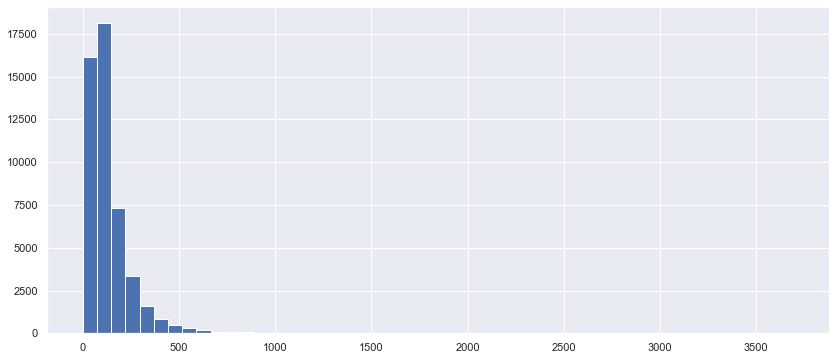

In [109]:
plt.figure(figsize=(14, 6))
plt.hist(df['Revenue'], bins=50, );

Highly Skewed a right tail

### Visualize the Raw Data

Text(0.5, 1.0, 'Visualization of raw data')

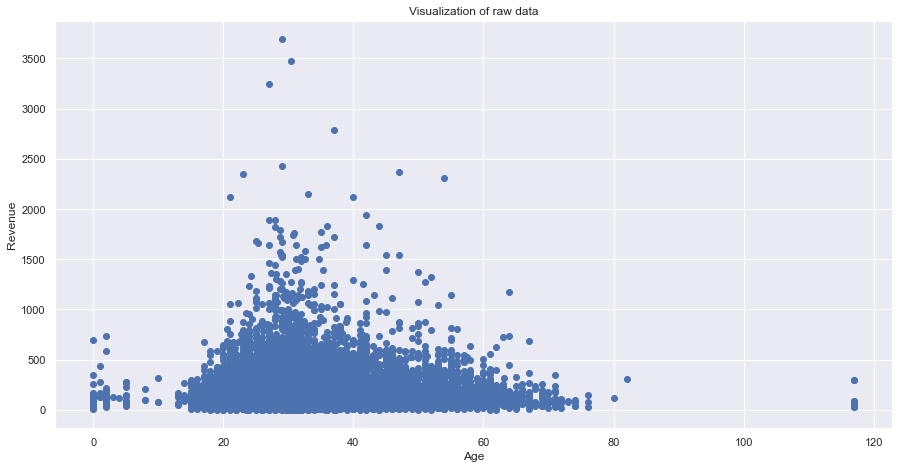

In [110]:
# We'll plot the data. We create a 12 by 9 inches figure.
# We have 2000 data points, which we'll scatter acrros Age and Income, located on positions 2 and 4 in our data set. 
plt.figure(figsize = (15, 7.5))
plt.scatter(df['User_Age'], df['Revenue'])
plt.xlabel('Age')
plt.ylabel('Revenue')
plt.title('Visualization of raw data')

Most of the Revenue revolves around the mean. There exist some users with age greater than 100

In [111]:
df_segmentation = df[['User_Age', 'Revenue', 'Hours', 'Day_of_week']]

In [112]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

### K-Means Clustering

In [113]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

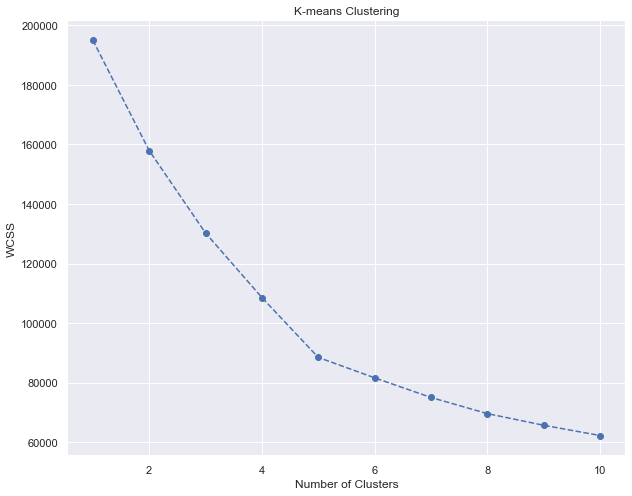

In [114]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [115]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

In [116]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=5, random_state=42)

### Results

In [117]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans = df.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [118]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,user ID,Is_First_Order,User_Gender,Revenue,Day_of_week,Hours,User_Birthyear,User_Age
Segment K-means,,,,,,,,
0,21748.750000,0.149744,0.125427,545.514578,2.642918,8.959898,1985.129340,31.497161
1,22147.482055,0.270096,0.157710,115.326767,4.363677,5.905973,1989.509998,28.961398
2,21900.281288,0.212638,0.142762,118.485055,2.419481,21.260782,1987.258147,30.250823
3,21981.349360,0.244013,0.167330,115.060206,1.071170,6.032400,1989.768204,28.793888
4,21661.546426,0.171887,0.144620,122.491612,2.600405,7.868091,1967.686497,48.305350


In [119]:
# Compute the size and proportions of the four clusters
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','City']].groupby(['Segment K-means']).count()
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [120]:
df_segm_analysis

,user ID,Is_First_Order,User_Gender,Revenue,Day_of_week,Hours,User_Birthyear,User_Age,N Obs,Prop Obs
Segment K-means,,,,,,,,,,
0,21748.750000,0.149744,0.125427,545.514578,2.642918,8.959898,1985.129340,31.497161,2344,0.048073
1,22147.482055,0.270096,0.157710,115.326767,4.363677,5.905973,1989.509998,28.961398,15687,0.321725
2,21900.281288,0.212638,0.142762,118.485055,2.419481,21.260782,1987.258147,30.250823,8973,0.184028
3,21981.349360,0.244013,0.167330,115.060206,1.071170,6.032400,1989.768204,28.793888,16327,0.334851
4,21661.546426,0.171887,0.144620,122.491612,2.600405,7.868091,1967.686497,48.305350,5428,0.111323


In [121]:
df_segm_analysis.rename({0:'well-off',
                         1:'average1',
                         2:'standard1',
                         3:'average2',
                         4:'standard2'})

,user ID,Is_First_Order,User_Gender,Revenue,Day_of_week,Hours,User_Birthyear,User_Age,N Obs,Prop Obs
Segment K-means,,,,,,,,,,
well-off,21748.750000,0.149744,0.125427,545.514578,2.642918,8.959898,1985.129340,31.497161,2344,0.048073
average1,22147.482055,0.270096,0.157710,115.326767,4.363677,5.905973,1989.509998,28.961398,15687,0.321725
standard1,21900.281288,0.212638,0.142762,118.485055,2.419481,21.260782,1987.258147,30.250823,8973,0.184028
average2,21981.349360,0.244013,0.167330,115.060206,1.071170,6.032400,1989.768204,28.793888,16327,0.334851
standard2,21661.546426,0.171887,0.144620,122.491612,2.600405,7.868091,1967.686497,48.305350,5428,0.111323


In [122]:
# Add the segment labels to our table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-off',
                                                                 1:'average1',
                                                                 2:'standard1',
                                                                 3:'average2',
                                                                 4:'standard2'})

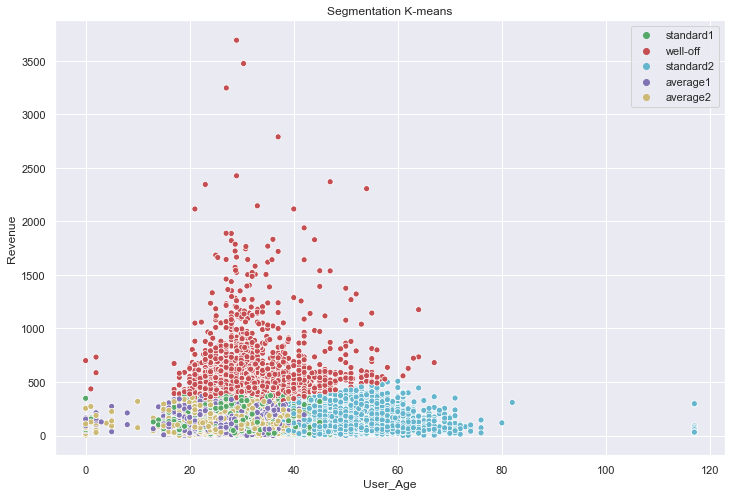

In [124]:
# plot the results from the K-means algorithm. 
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = 'User_Age'
y_axis = 'Revenue'
plt.figure(figsize = (12, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'].values, palette = ['g', 'r', 'c', 'm', 'y'], data=df_segm_kmeans)
plt.title('Segmentation K-means')
plt.show()

Since the separation is not so clear, i employed the PCA dimentionality reduction method

In [125]:
# Employ PCA to find a subset of components, which explain the variance in the data.
pca = PCA()

In [126]:
# Fit PCA with our standardized data.
pca.fit(segmentation_std)

PCA()

In [127]:
# The attribute shows how much variance is explained by each of the seven individual components.
pca.explained_variance_ratio_

array([0.26041306, 0.25774129, 0.24336379, 0.23848186])

Text(0, 0.5, 'Cumulative Explained Variance')

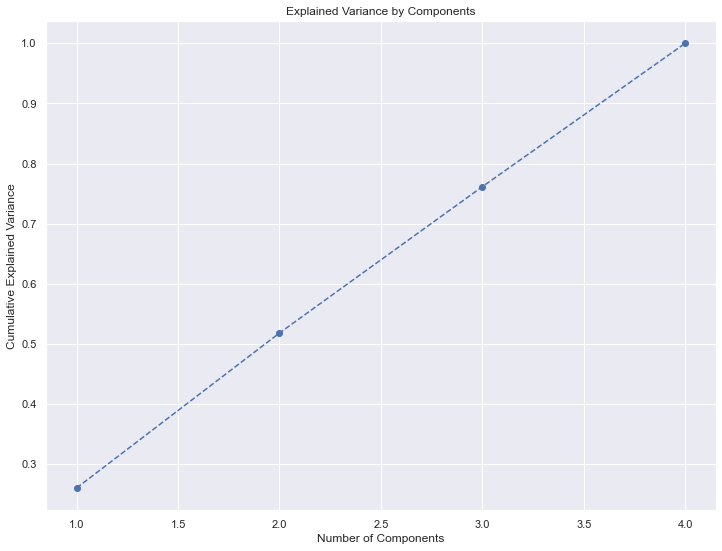

In [129]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep. 
# Generally, we want to keep around 80 % of the explained variance.
plt.figure(figsize = (12,9))
plt.plot(range(1,5), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [130]:
# We choose three components. 3 or 4 seems the right choice according to the previous graph.
pca = PCA(n_components = 4)

In [131]:
#Fit the model the our data with the selected number of components. In our case three.
pca.fit(segmentation_std)

PCA(n_components=4)

#### PCA Results

In [132]:
# The components attribute shows the loadings of each component on each of the seven original features.
# The loadings are the correlations between the components and the original features. 
pca.components_

array([[ 0.07423939,  0.09823582,  0.720447  , -0.68249129],
       [ 0.67827579,  0.68297931,  0.08180108,  0.25843723],
       [-0.72085516,  0.68976849,  0.03510105,  0.05792392],
       [ 0.12164826,  0.21933632, -0.68777367, -0.68121998]])

In [133]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_segmentation.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3', 'Component 4'])
df_pca_comp

,User_Age,Revenue,Hours,Day_of_week
Component 1,0.074239,0.098236,0.720447,-0.682491
Component 2,0.678276,0.682979,0.081801,0.258437
Component 3,-0.720855,0.689768,0.035101,0.057924
Component 4,0.121648,0.219336,-0.687774,-0.681220


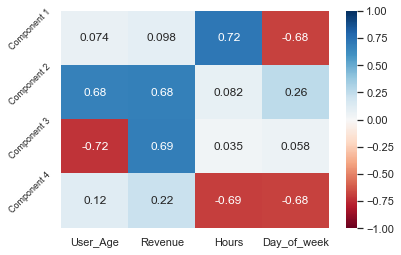

In [134]:
# Heat Map for Principal Components against original features. Again we use the RdBu color scheme and set borders to -1 and 1.
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2, 3], 
           ['Component 1', 'Component 2', 'Component 3', 'Component 4'],
           rotation = 45,
           fontsize = 9);
plt.show()

In [135]:
scores_pca = pca.transform(segmentation_std)

#### PCA with K-Means

In [136]:
# We fit K means using the transformed data from the PCA.
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

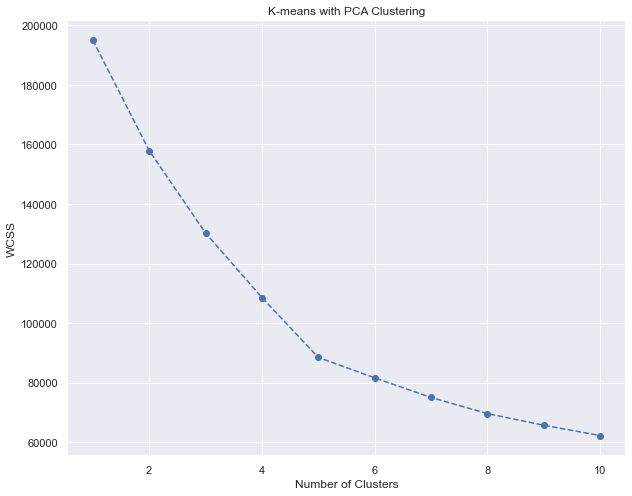

In [137]:
# Plot the Within Cluster Sum of Squares for the K-means PCA model. Here we make a decission about the number of clusters.
# Again it looks like four is the best option.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [138]:
# Same initializer and random state as before.
kmeans_pca = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

In [139]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=5, random_state=42)

### ${\textbf{K-means clustering with PCA Results}}$

In [140]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-4: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4']
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [141]:
df_segm_pca_kmeans

,User_Age,Revenue,Hours,Day_of_week,Component 1,Component 2,Component 3,Component 4,Segment K-means PCA
0,24.000000,212.50,20,5,0.234212,0.233008,1.170905,-1.880691,2
1,24.000000,526.36,20,5,0.470896,1.878542,2.832796,-1.352233,0
2,34.500000,77.23,20,5,0.226508,0.385393,-0.461029,-1.953924,2
3,31.000000,190.91,20,5,0.280800,0.694208,0.446134,-1.814025,2
4,30.807018,204.09,21,5,0.389993,0.758940,0.537671,-1.891081,2
...,...,...,...,...,...,...,...,...,...
48754,29.933333,99.09,8,2,0.066910,-0.420059,-0.097463,0.247343,3
48755,26.000000,30.87,13,2,0.485075,-1.043152,-0.091072,-0.407445,3
48756,16.000000,236.36,5,0,0.460178,-1.149912,1.768787,1.279156,3
48757,26.000000,257.19,20,6,-0.073052,0.767339,1.263587,-2.134270,2


In [142]:
# We calculate the means by segments.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,User_Age,Revenue,Hours,Day_of_week,Component 1,Component 2,Component 3,Component 4
Segment K-means PCA,,,,,,,,
0,31.497161,545.514578,8.959898,2.642918,0.283784,2.147206,2.154289,0.699146
1,28.961398,115.326767,5.905973,4.363677,-0.989434,-0.117439,0.134971,-0.384550
2,30.250823,118.485055,21.260782,2.419481,1.272997,-0.083255,0.055571,-1.144051
3,28.793888,115.060206,6.032400,1.071170,0.203398,-0.578630,0.048491,0.779916
4,48.305350,122.491612,7.868091,2.600405,0.020739,1.290263,-1.558087,0.354738


In [144]:
# Calculate the size of each cluster and its proportion to the entire data set.
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Day_of_week']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'high-spenders', 
                                                          1:'average-spenders',
                                                          2:'standard-spenders', 
                                                          3:'average-spenders',
                                                          4: 'standard-spenders'})
df_segm_pca_kmeans_freq

,User_Age,Revenue,Hours,Day_of_week,Component 1,Component 2,Component 3,Component 4,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,
high-spenders,31.497161,545.514578,8.959898,2.642918,0.283784,2.147206,2.154289,0.699146,2344,0.048073
average-spenders,28.961398,115.326767,5.905973,4.363677,-0.989434,-0.117439,0.134971,-0.384550,15687,0.321725
standard-spenders,30.250823,118.485055,21.260782,2.419481,1.272997,-0.083255,0.055571,-1.144051,8973,0.184028
average-spenders,28.793888,115.060206,6.032400,1.071170,0.203398,-0.578630,0.048491,0.779916,16327,0.334851
standard-spenders,48.305350,122.491612,7.868091,2.600405,0.020739,1.290263,-1.558087,0.354738,5428,0.111323


In [145]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'high-spenders', 
                                                                              1:'average-spenders',
                                                                              2:'standard-spenders', 
                                                                              3:'average-spenders',
                                                                              4: 'standard-spenders'})

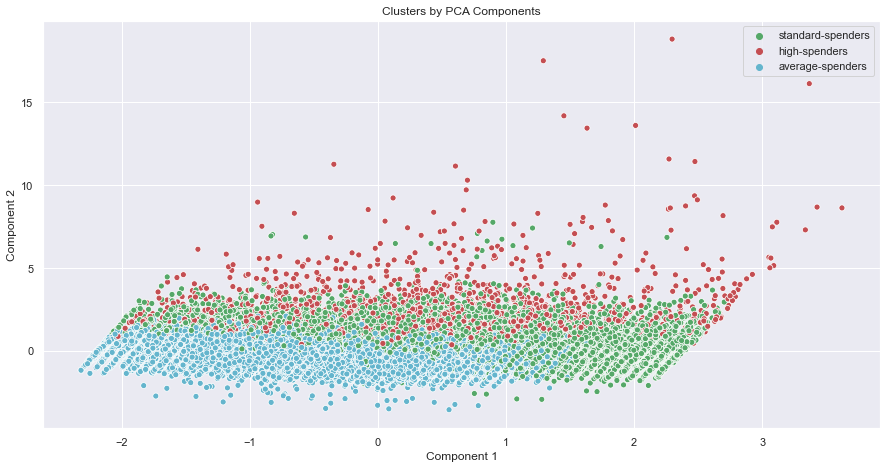

In [146]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Component 1']
y_axis = df_segm_pca_kmeans['Component 2']
hue = df_segm_pca_kmeans['Legend'].values
plt.figure(figsize = (15, 7.5))
sns.scatterplot(x_axis, y_axis, hue = hue, palette = ['g', 'r', 'c',])
plt.title('Clusters by PCA Components')
plt.show()

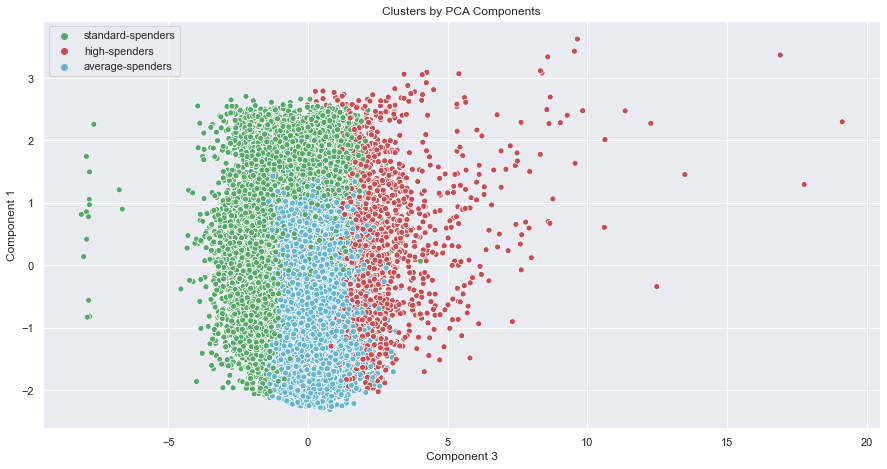

In [148]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Component 3']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (15, 7.5))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'].values, palette = ['g', 'r', 'c',])
plt.title('Clusters by PCA Components')
plt.show()

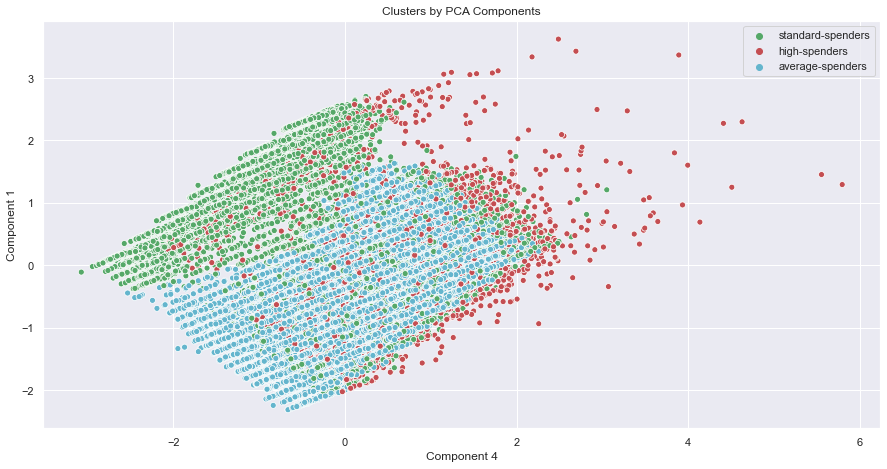

In [149]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Component 4']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (15, 7.5))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'].values, palette = ['g', 'r', 'c',])
plt.title('Clusters by PCA Components')
plt.show()

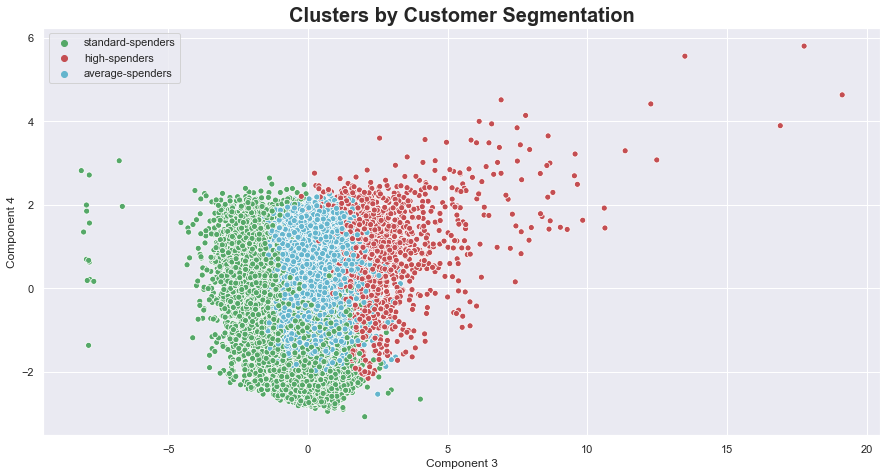

In [161]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Component 3']
y_axis = df_segm_pca_kmeans['Component 4']
plt.figure(figsize = (15, 7.5))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'].values, palette = ['g', 'r', 'c', ])
plt.title('Clusters by Customer Segmentation', size=20, fontweight='bold')
plt.show()

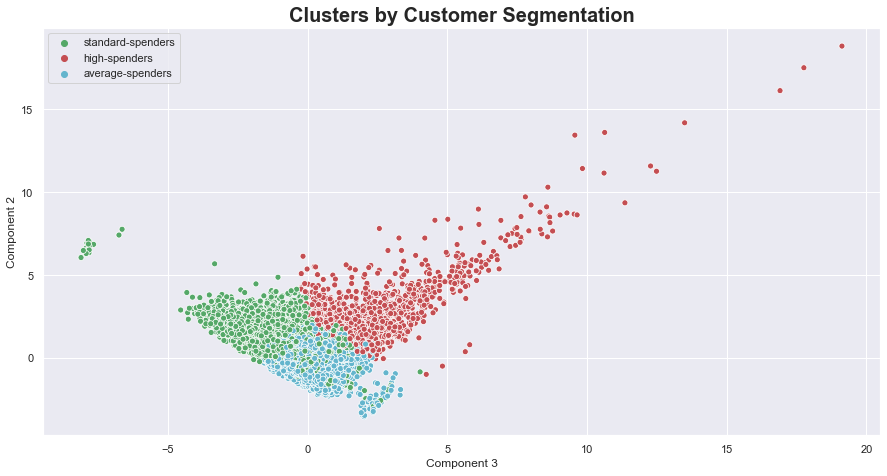

In [157]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Component 3']
y_axis = df_segm_pca_kmeans['Component 2']
plt.figure(figsize = (15, 7.5))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'].values, palette = ['g', 'r', 'c',])
plt.title('Clusters by Customer Segmentation', size=20, fontweight='bold')

plt.show()

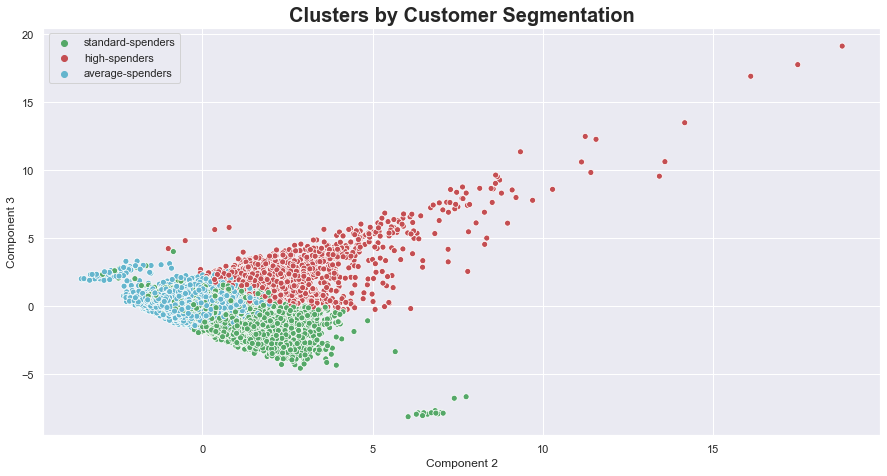

In [158]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 3']
plt.figure(figsize = (15, 7.5))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'].values, palette = ['g', 'r', 'c',])
plt.title('Clusters by Customer Segmentation', size=20, fontweight='bold')

plt.show()

In [162]:
y_kmeans = kmeans_pca.labels_

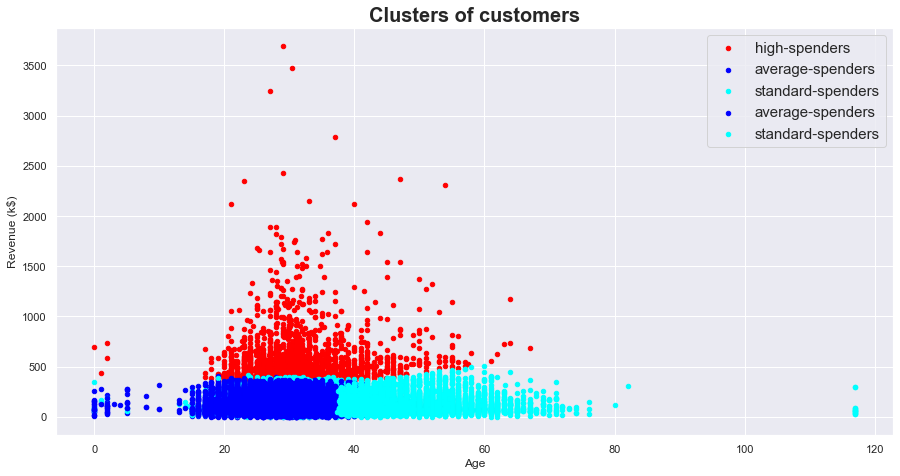

In [167]:
# unzip all values for all column in X DataFrame and store them in x(array)
x = df_segm_pca_kmeans.values

plt.figure(figsize=(15,7.5))
# x[y_kmeans == 0, 0] is a conditional statement that prints the value of x[i] for all i in X, only if where y_kmeans ==0
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 20, c = 'red', label = 'high-spenders')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'average-spenders')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 20, c = 'cyan', label = 'standard-spenders')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 20, c = 'blue', label = 'average-spenders')
plt.scatter(x[y_kmeans == 4 , 0], x[y_kmeans == 4, 1], s = 20, c = 'cyan', label = 'standard-spenders')
plt.title('Clusters of customers', size=20, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Revenue (k$)')
plt.legend(prop={'size': 15}) #Show labels in all scatter plots as legend
plt.show()

**Provide Definition of each group**
1. Average: these are customers which gives the brand an average revenue value (111)
2. Fewer Opportunities: Are Customers in which 70% orders a product for the first time and return a smaller revenue value on Average
3. Extremely Rich: These Customers transactions returns a very high revenue to the brand, they buy many products and majority are female (90%)
4. Standard: Provides a good revenue to the brand, majority are female (91%) and buys regularly from the brand